In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

<pre>
데이터 변수 설명
- index  --> drop
- gender: 성별
- car: 차량 소유 여부
- reality: 부동산 소유 여부
- child_num: 자녀 수
- income_total: 연간 소득

- income_type: 소득 분류
['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']

- edu_type: 교육 수준
['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']

- family_type: 결혼 여부
['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']

- house_type: 생활 방식
['Municipal apartment', 'House / apartment', 'With parents', 'Co-op apartment', 'Rented apartment', 'Office apartment']

- DAYS_BIRTH: 출생일
데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미

- DAYS_EMPLOYED: 업무 시작일
데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미
양수 값은 고용되지 않은 상태를 의미함

- FLAG_MOBIL: 핸드폰 소유 여부  --> drop

- work_phone: 업무용 전화 소유 여부

- phone: 전화 소유 여부

- email: 이메일 소유 여부

- occyp_type: 직업 유형													

- family_size: 가족 규모

- begin_month: 신용카드 발급 월
데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미

- credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도
=> 낮을 수록 높은 신용의 신용카드 사용자를 의미함

</pre>

In [158]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [159]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

### begin_month까지 똑같은 row

In [319]:
temp = train.copy()
temp['ID'] = \
temp['child_num'].astype(str) + '_' + temp['income_total'].astype(str) + '_' +\
temp['DAYS_BIRTH'].astype(str) + '_' + temp['DAYS_EMPLOYED'].astype(str) + '_' +\
temp['work_phone'].astype(str) + '_' + temp['phone'].astype(str) + '_' +\
temp['email'].astype(str) + '_' + temp['family_size'].astype(str) + '_' +\
temp['gender'].astype(str) + '_' + temp['car'].astype(str) + '_' +\
temp['reality'].astype(str) + '_' + temp['income_type'].astype(str) + '_' +\
temp['edu_type'].astype(str) + '_' + temp['family_type'].astype(str) + '_' +\
temp['house_type'].astype(str) + '_' + temp['occyp_type'].astype(str) + '-' +\
temp['begin_month'].astype(str)

In [320]:
label_encoder=preprocessing.LabelEncoder()
temp['ID']=label_encoder.fit_transform(temp['ID'])

In [348]:
id_index = temp.groupby('ID')['credit'].nunique().where(temp.groupby('ID')['credit'].nunique() >= 2).dropna().index
# 모든 columns 같고, credit만 다름: 706명 
# 3개 : 13명
# 2개 : 693명 
id_index

Int64Index([    2,     3,    13,    72,   136,   153,   190,   340,   435,
              452,
            ...
            23815, 23926, 24006, 24026, 24030, 24050, 24052, 24054, 24061,
            24071],
           dtype='int64', name='ID', length=706)

In [353]:
temp[temp.ID.isin(id_index)].describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit,ID
count,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1519.0,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000
mean,13270.053983,0.414088,192088.259052,-15827.853193,51510.671494,1.0,0.267281,0.302172,0.089533,2.162607,-26.520079,1.192890,12142.436471
std,7714.542174,0.741459,93461.566871,4054.347876,130543.916035,0.0,0.442686,0.459351,0.285605,0.928553,16.588310,0.796271,6636.595617
min,1.000000,0.000000,31500.000000,-24662.000000,-15038.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000,2.000000
25%,6611.000000,0.000000,135000.000000,-18825.500000,-3259.000000,1.0,0.000000,0.000000,0.000000,2.000000,-40.000000,1.000000,6979.000000
50%,13446.000000,0.000000,180000.000000,-15351.000000,-1693.000000,1.0,0.000000,0.000000,0.000000,2.000000,-25.000000,1.000000,12016.000000
75%,19806.500000,1.000000,225000.000000,-12554.500000,-451.000000,1.0,1.000000,1.000000,0.000000,3.000000,-12.000000,2.000000,17672.000000
max,26432.000000,4.000000,945000.000000,-8251.000000,365243.000000,1.0,1.000000,1.000000,1.000000,6.000000,0.000000,2.000000,24071.000000


In [339]:
temp[temp["ID"] == 6926]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,ID
12178,12178,F,N,Y,0,180000.0,Working,Secondary / secondary special,Single / not married,House / apartment,...,-2939,1,0,0,0,Sales staff,1.0,-59.0,1.0,6926
16254,16254,F,N,Y,0,180000.0,Working,Secondary / secondary special,Single / not married,House / apartment,...,-2939,1,0,0,0,Sales staff,1.0,-59.0,2.0,6926
24786,24786,F,N,Y,0,180000.0,Working,Secondary / secondary special,Single / not married,House / apartment,...,-2939,1,0,0,0,Sales staff,1.0,-59.0,0.0,6926


### begin_month 제외 중복

In [160]:
train['ID'] = \
train['child_num'].astype(str) + '_' + train['income_total'].astype(str) + '_' +\
train['DAYS_BIRTH'].astype(str) + '_' + train['DAYS_EMPLOYED'].astype(str) + '_' +\
train['work_phone'].astype(str) + '_' + train['phone'].astype(str) + '_' +\
train['email'].astype(str) + '_' + train['family_size'].astype(str) + '_' +\
train['gender'].astype(str) + '_' + train['car'].astype(str) + '_' +\
train['reality'].astype(str) + '_' + train['income_type'].astype(str) + '_' +\
train['edu_type'].astype(str) + '_' + train['family_type'].astype(str) + '_' +\
train['house_type'].astype(str) + '_' + train['occyp_type'].astype(str)

In [161]:
label_encoder=preprocessing.LabelEncoder()
train['ID']=label_encoder.fit_transform(train['ID'])

In [162]:
train.groupby('ID')['begin_month', 'credit'].nunique()

c:\it\python_workspace\lecml\venv_lecml\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,begin_month,credit
ID,,
0,1,1
1,4,2
2,6,3
3,2,2
4,3,2
...,...,...
8754,2,1
8755,5,2
8756,1,1


In [164]:
train.groupby('ID')['begin_month','credit'].agg(list)

c:\it\python_workspace\lecml\venv_lecml\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,begin_month,credit
ID,,
0,[-7.0],[1.0]
1,"[-3.0, -30.0, -2.0, -1.0, -2.0, -3.0]","[1.0, 0.0, 0.0, 0.0, 1.0, 0.0]"
2,"[-29.0, -1.0, -16.0, -14.0, -5.0, -14.0, -10.0]","[0.0, 1.0, 2.0, 2.0, 0.0, 2.0, 2.0]"
3,"[-20.0, -5.0]","[0.0, 2.0]"
4,"[-59.0, -40.0, -40.0, -5.0]","[1.0, 1.0, 2.0, 2.0]"
...,...,...
8754,"[-21.0, -16.0]","[2.0, 2.0]"
8755,"[-11.0, -15.0, -20.0, -21.0, -10.0]","[2.0, 1.0, 1.0, 1.0, 1.0]"
8756,[-50.0],[2.0]


In [166]:
# # 리스트가 인덱스 순이 맞는지 확인 
# temp = train.copy()
# temp['ind_begin_month'] = temp['index'].astype(str) + '_' + temp['begin_month'].astype(str)
# temp['ind_credit'] = temp['index'].astype(str) + '_' + temp['credit'].astype(str)

# temp.groupby('ID')['ind_begin_month','ind_credit'].agg(list)

In [170]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [171]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,ID
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,...,-4709,1,0,0,0,NaN,2.0,-6.0,1.0,3096
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,...,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0,7301
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,...,-4434,1,0,1,0,Managers,2.0,-22.0,2.0,5063
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0,3128
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,...,-2105,1,0,0,0,Managers,2.0,-26.0,2.0,1917


In [173]:
# ID별 begin_month, credit
Gid_bc = train.groupby('ID')['begin_month','credit'].agg(list)

c:\it\python_workspace\lecml\venv_lecml\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [181]:
# 카드를 2개 이상 발급받은 사람: 5510 
Gid_bc[Gid_bc['begin_month'].str.len() >= 2]

,begin_month,credit
ID,,
1,"[-3.0, -30.0, -2.0, -1.0, -2.0, -3.0]","[1.0, 0.0, 0.0, 0.0, 1.0, 0.0]"
2,"[-29.0, -1.0, -16.0, -14.0, -5.0, -14.0, -10.0]","[0.0, 1.0, 2.0, 2.0, 0.0, 2.0, 2.0]"
3,"[-20.0, -5.0]","[0.0, 2.0]"
4,"[-59.0, -40.0, -40.0, -5.0]","[1.0, 1.0, 2.0, 2.0]"
6,"[-7.0, -16.0, -2.0, -27.0, -39.0, -22.0, -17.0...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, ..."
...,...,...
8751,"[-22.0, -24.0]","[2.0, 2.0]"
8754,"[-21.0, -16.0]","[2.0, 2.0]"
8755,"[-11.0, -15.0, -20.0, -21.0, -10.0]","[2.0, 1.0, 1.0, 1.0, 1.0]"


In [186]:
# 카드 발급을 가장 많이 받은 사람: 35개
max(Gid_bc['begin_month'].str.len())

35

In [248]:
# 20개 이상 발급받은 사람: 9
Gid_bc_20 =  Gid_bc[Gid_bc['begin_month'].str.len() >= 20]
Gid_bc_20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 631 to 8349
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   begin_month  9 non-null      object
 1   credit       9 non-null      object
dtypes: object(2)
memory usage: 216.0+ bytes


In [247]:
# 카드 발급 개수 별 인원 수
Gid_bc['begin_month'].str.len().value_counts().sort_index(ascending=True)

1     3249
2     1680
3     1123
4      831
5      593
6      450
7      290
8      161
9      136
10      86
11      59
12      37
13      19
14      15
15      10
16       7
17       1
18       2
19       1
20       5
21       1
24       2
35       1
Name: begin_month, dtype: int64

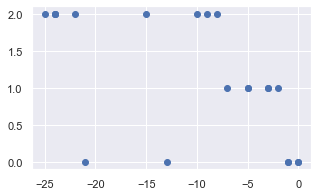

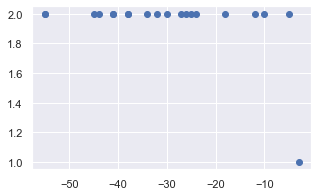

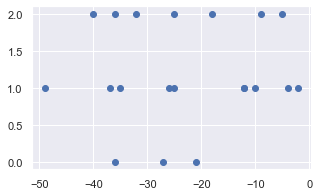

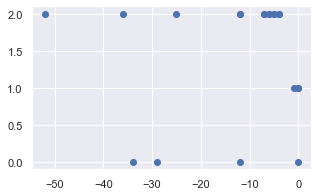

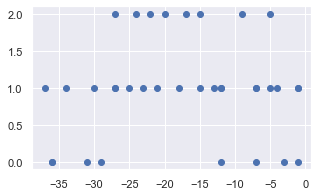

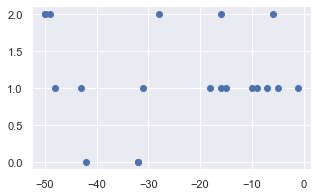

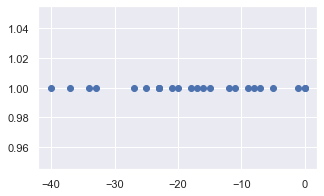

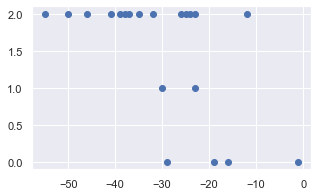

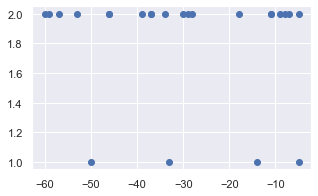

In [221]:
# 카드 발급개수 20개 이상, x: begin_month, y: credit
for i, row in Gid_bc_20.iterrows():
    plt.figure(figsize=(5, 3))
    plt.scatter(row['begin_month'], row['credit'])
    plt.show()

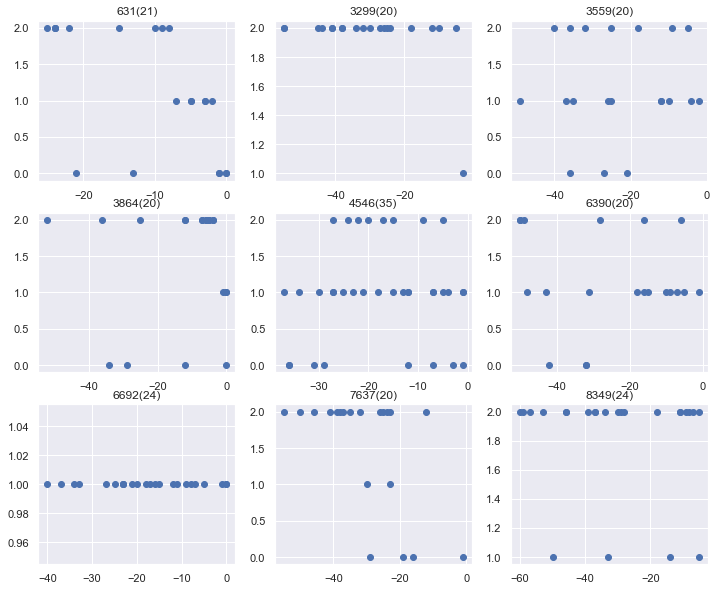

In [297]:
# 카드 발급개수 20개 이상, x: begin_month, y: credit
plt.subplots(figsize = (12, 10))
n = 1
for i, row in Gid_bc_20.iterrows():
    plt.subplot(3, 3, n)
    plt.scatter(row['begin_month'], row['credit'])
    plt.title(str(i) + '('+ str(len(row['begin_month'])) + ')')
    n += 1

In [278]:
Gid_bc["mean_credit"] = Gid_bc["credit"].apply(lambda x: sum(x)/len(x) if isinstance(x, (list, tuple)) else x)
Gid_bc["card_num"] = Gid_bc['begin_month'].str.len()
Gid_bc

,begin_month,credit,mean_credit,card_num
ID,,,,
0,[-7.0],[1.0],1.000000,1
1,"[-3.0, -30.0, -2.0, -1.0, -2.0, -3.0]","[1.0, 0.0, 0.0, 0.0, 1.0, 0.0]",0.333333,6
2,"[-29.0, -1.0, -16.0, -14.0, -5.0, -14.0, -10.0]","[0.0, 1.0, 2.0, 2.0, 0.0, 2.0, 2.0]",1.285714,7
3,"[-20.0, -5.0]","[0.0, 2.0]",1.000000,2
4,"[-59.0, -40.0, -40.0, -5.0]","[1.0, 1.0, 2.0, 2.0]",1.500000,4
...,...,...,...,...
8754,"[-21.0, -16.0]","[2.0, 2.0]",2.000000,2
8755,"[-11.0, -15.0, -20.0, -21.0, -10.0]","[2.0, 1.0, 1.0, 1.0, 1.0]",1.200000,5
8756,[-50.0],[2.0],2.000000,1


In [287]:
# 카드 발급 개수 별 credit 평균 
mean_credit = pd.DataFrame(Gid_bc['begin_month'].str.len().value_counts().sort_index(ascending=True))
mean_credit.index.names = ['card_num']
mean_credit.columns = ['people_num']
mean_credit['credit_mean'] = Gid_bc['mean_credit'].groupby(Gid_bc['card_num']).mean()

In [356]:
# 카드 발급 개수 별 평균 credit
mean_credit

,people_num,credit_mean
card_num,,
1,3249,1.564174
2,1680,1.547619
3,1123,1.555358
4,831,1.567389
5,593,1.519393
6,450,1.518519
7,290,1.488177
8,161,1.495342
9,136,1.478758


In [298]:
# credit 분포
train["credit"].value_counts()

2.0    16968
1.0     6267
0.0     3222
Name: credit, dtype: int64

### 12개월 이내

In [306]:
temp = train.copy()
temp = temp[temp['begin_month'] >= -12]
# ID별 begin_month, credit
Gid_bc_12m = temp.groupby('ID')['begin_month','credit'].agg(list)

c:\it\python_workspace\lecml\venv_lecml\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


In [307]:
# 카드 발급 개수 별 인원 수
Gid_bc_12m['begin_month'].str.len().value_counts().sort_index(ascending=True)

1     2912
2      974
3      341
4      125
5       60
6       23
7       15
8        4
9        3
10       1
12       1
13       1
14       1
15       1
Name: begin_month, dtype: int64

In [303]:
# 12개월 이내에 9개 이상 발급받은 사람: 8
Gid_bc_9 =  Gid_bc_12m[Gid_bc_12m['begin_month'].str.len() >= 9]
Gid_bc_9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 631 to 6692
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   begin_month  8 non-null      object
 1   credit       8 non-null      object
dtypes: object(2)
memory usage: 192.0+ bytes


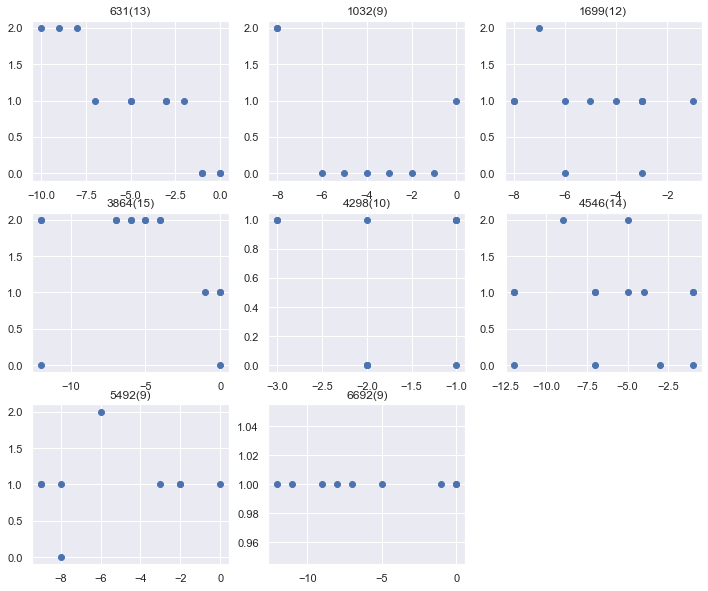

In [304]:
# 카드 발급개수 20개 이상, x: begin_month, y: credit
plt.subplots(figsize = (12, 10))
n = 1
for i, row in Gid_bc_9.iterrows():
    plt.subplot(3, 3, n)
    plt.scatter(row['begin_month'], row['credit'])
    plt.title(str(i) + '('+ str(len(row['begin_month'])) + ')')
    n += 1

In [305]:
Gid_bc_12m["mean_credit"] = Gid_bc_12m["credit"].apply(lambda x: sum(x)/len(x) if isinstance(x, (list, tuple)) else x)
Gid_bc_12m["card_num"] = Gid_bc_12m['begin_month'].str.len()
Gid_bc_12m

# 카드 발급 개수 별 credit 평균 
mean_credit_12m = pd.DataFrame(Gid_bc_12m['begin_month'].str.len().value_counts().sort_index(ascending=True))
mean_credit_12m.index.names = ['card_num']
mean_credit_12m.columns = ['people_num']
mean_credit_12m['credit_mean'] = Gid_bc_12m['mean_credit'].groupby(Gid_bc_12m['card_num']).mean()

# 카드 발급 개수 별 평균 credit
mean_credit_12m

,people_num,credit_mean
card_num,,
1,2912,1.398352
2,974,1.366016
3,341,1.304008
4,125,1.240000
5,60,1.190000
6,23,1.028986
7,15,1.142857
8,4,0.468750
9,3,0.851852


In [308]:
train.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit,ID
count,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560,4403.505802
std,7637.622372,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283,2518.686771
min,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000,0.000000
25%,6614.000000,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000,2231.000000
50%,13228.000000,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000,4392.000000
75%,19842.000000,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000,6622.000000
max,26456.000000,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000,8758.000000


#### 카드 개수 4개

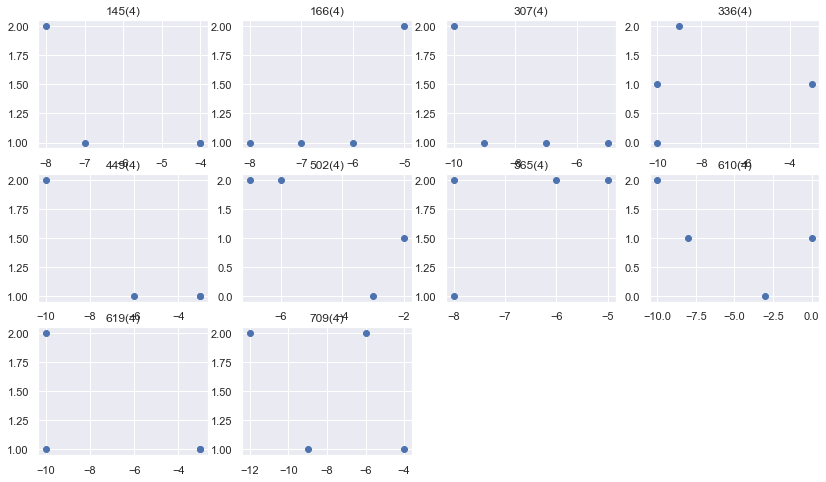

In [317]:
# 12개월 이내에 4개 발급받은 사람: 125
Gid_bc_4 =  Gid_bc_12m[Gid_bc_12m['begin_month'].str.len() == 4]
# Gid_bc_4.info()

# 카드 발급개수 4개, x: begin_month, y: credit
plt.subplots(figsize = (14, 8))
n = 1
for i, row in Gid_bc_4[:10].iterrows():
    plt.subplot(3, 4, n)
    plt.scatter(row['begin_month'], row['credit'])
    plt.title(str(i) + '('+ str(len(row['begin_month'])) + ')')
    n += 1